# These are Tasks for this Notebook:
* What are TOP three columns influence price of a used car?
* Which single column has most influence on price of a used car?
* Does color of a car have influent on price of a used car?
* Does region have influent on price of a used car?
* Which column has linear regression on price?


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# Any results you write to the current directory are saved as output.

**Read CSV file for used car data analysis**

### Note: 
         due to low RAM system, i'm not able to load  vehicles.csv ( shape(rows: 50,000+, columns:26)) csv file.
         used new_vehicles.csv ( shape(rows: 5,000, columns:26)) csv file.           

In [2]:
#import os
#os.chdir('C:/Users/DELL/Desktop/Projects/Kaggle/Used Car Price Prediction')

In [3]:
#cars = pd.read_csv ('vehicles.csv')
#cars = cars[0:5000]
#cars.head()

In [4]:
#cars.to_csv('new_vehicles.csv')

### New Data Importing

In [5]:
cars = pd.read_csv ('new_vehicles.csv')
cars.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [6]:
cars.shape

(5000, 26)

# Data Wrangling and dropping unwanted columns

In [7]:
cars.info()
cars.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
Unnamed: 0      5000 non-null int64
id              5000 non-null int64
url             5000 non-null object
region          5000 non-null object
region_url      5000 non-null object
price           5000 non-null int64
year            4994 non-null float64
manufacturer    4798 non-null object
model           4945 non-null object
condition       3010 non-null object
cylinders       2958 non-null object
fuel            4966 non-null object
odometer        4052 non-null float64
title_status    4961 non-null object
transmission    4976 non-null object
vin             3412 non-null object
drive           3605 non-null object
size            1226 non-null object
type            3806 non-null object
paint_color     3279 non-null object
image_url       4999 non-null object
description     4999 non-null object
county          0 non-null float64
state           5000 non-null object
lat     

Unnamed: 0         0
id                 0
url                0
region             0
region_url         0
price              0
year               6
manufacturer     202
model             55
condition       1990
cylinders       2042
fuel              34
odometer         948
title_status      39
transmission      24
vin             1588
drive           1395
size            3774
type            1194
paint_color     1721
image_url          1
description        1
county          5000
state              0
lat              161
long             161
dtype: int64

In [8]:
#Dropping year column since whole data was for the year 1970
del  cars['id'],cars['url'],cars ['region_url'],cars['description'],cars['lat'],cars['long'],cars['image_url'], cars['vin'],cars['county'], cars['title_status'],cars['size'],cars['condition']

In [9]:
cars.head()

,Unnamed: 0,region,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
0,0,greensboro,10299,2012.0,acura,tl,NaN,gas,90186.0,automatic,NaN,other,blue,nc
1,1,greensboro,0,2011.0,bmw,335,6 cylinders,gas,115120.0,automatic,rwd,convertible,blue,nc
2,2,greensboro,9500,2011.0,jaguar,xf,NaN,gas,85000.0,automatic,NaN,NaN,blue,nc
3,3,greensboro,3995,2004.0,honda,element,NaN,gas,212526.0,automatic,fwd,SUV,orange,nc
4,4,lincoln,41988,2016.0,chevrolet,silverado k2500hd,NaN,gas,NaN,automatic,NaN,NaN,NaN,ne


In [10]:
cars.dtypes

Unnamed: 0        int64
region           object
price             int64
year            float64
manufacturer     object
model            object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
paint_color      object
state            object
dtype: object

In [11]:
cars['year'] = pd.to_datetime (cars['year'])

In [12]:
cars['year'] = cars['year'].astype ('str')
cars['year'] = cars['year'].apply (lambda x: x.split()[0])
cars['year'] = pd.to_datetime (cars['year'])

In [13]:
Total = cars.isnull().sum().sort_values(ascending=False)
percent = ((cars.isnull().sum()/cars.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([Total,percent],axis=1,keys=['Total','percent'])
missing_data

,Total,percent
cylinders,2042,40.84
paint_color,1721,34.42
drive,1395,27.90
type,1194,23.88
odometer,948,18.96
manufacturer,202,4.04
model,55,1.10
fuel,34,0.68
transmission,24,0.48
year,6,0.12


The columns cylinders, paint_color, drive, type and odometer are important columns for this data analysis. So, dropping NAN values from this dataframe

In [14]:
cars.dropna(inplace = True)

In [15]:
cars.isnull().sum()

Unnamed: 0      0
region          0
price           0
year            0
manufacturer    0
model           0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [16]:
cars['cylinders'] = cars['cylinders'].apply (lambda x: x.replace('other','0 other'))
cars['cylinders'].head()

1     6 cylinders
13    8 cylinders
28    6 cylinders
29    6 cylinders
31    6 cylinders
Name: cylinders, dtype: object

In [17]:
cars['cylinders'] = cars['cylinders'].apply (lambda x: x.split()[0])
cars['cylinders'].head()

1     6
13    8
28    6
29    6
31    6
Name: cylinders, dtype: object

In [18]:
cars['cylinders'] = cars['cylinders'].astype('int')
cars['cylinders'].head()

1     6
13    8
28    6
29    6
31    6
Name: cylinders, dtype: int32

In [19]:
cars.drop (cars [cars['cylinders'] == 0 ].index,inplace = True)


In [20]:
#Since while data is extracted for the year 1970, dropping that column 
del cars['year']

In [21]:
cars.shape

(1584, 13)

In [22]:
cars.head()

,Unnamed: 0,region,price,manufacturer,model,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
1,1,greensboro,0,bmw,335,6,gas,115120.0,automatic,rwd,convertible,blue,nc
13,13,denver,7995,chevrolet,silverado 1500 4wd,8,gas,194050.0,automatic,4wd,truck,white,co
28,28,greensboro,16000,bmw,535i,6,gas,85000.0,automatic,fwd,sedan,grey,nc
29,29,syracuse,10950,buick,lucerne cxl v6,6,gas,43418.0,automatic,fwd,sedan,red,ny
31,31,syracuse,9400,bmw,x5,6,gas,145000.0,automatic,4wd,SUV,blue,ny


In [23]:
cars.describe()

,Unnamed: 0,price,cylinders,odometer
count,1584.000000,1584.000000,1584.000000,1.584000e+03
mean,2453.550505,11316.647096,5.919192,1.015933e+05
std,1447.786553,10330.865349,1.567528,7.855502e+04
min,1.000000,0.000000,3.000000,0.000000e+00
25%,1211.500000,3995.000000,4.000000,5.300000e+04
50%,2405.500000,8500.000000,6.000000,9.751100e+04
75%,3623.250000,16995.000000,8.000000,1.387030e+05
max,4999.000000,82000.000000,10.000000,2.170000e+06


In [24]:
print ("Mean : " , int (cars['price'].mean()))
print ("Mode : " , cars['price'].mode())
print ("Median : " , cars['price'].median())

Mean :  11316
Mode :  0    0
dtype: int64
Median :  8500.0


In [25]:
cars.head()

,Unnamed: 0,region,price,manufacturer,model,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
1,1,greensboro,0,bmw,335,6,gas,115120.0,automatic,rwd,convertible,blue,nc
13,13,denver,7995,chevrolet,silverado 1500 4wd,8,gas,194050.0,automatic,4wd,truck,white,co
28,28,greensboro,16000,bmw,535i,6,gas,85000.0,automatic,fwd,sedan,grey,nc
29,29,syracuse,10950,buick,lucerne cxl v6,6,gas,43418.0,automatic,fwd,sedan,red,ny
31,31,syracuse,9400,bmw,x5,6,gas,145000.0,automatic,4wd,SUV,blue,ny


# Data Visualization

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

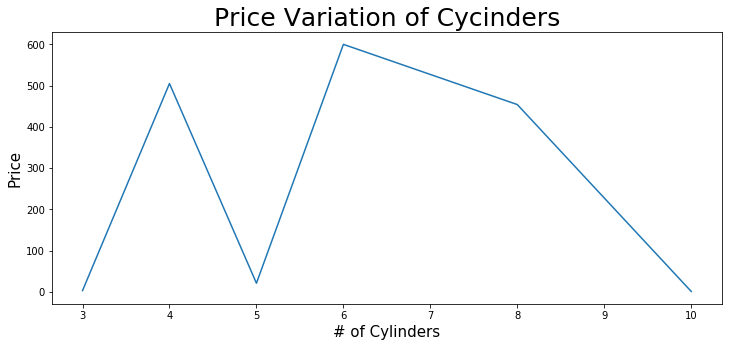

In [27]:
plt.figure (figsize = (12,5))

Cylin_df = cars.groupby ('cylinders')['price'].count()
plt.plot(Cylin_df)

plt.xlabel ('# of Cylinders',size=15)
plt.ylabel ('Price',size =15)

plt.title('Price Variation of Cycinders',size=25)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()


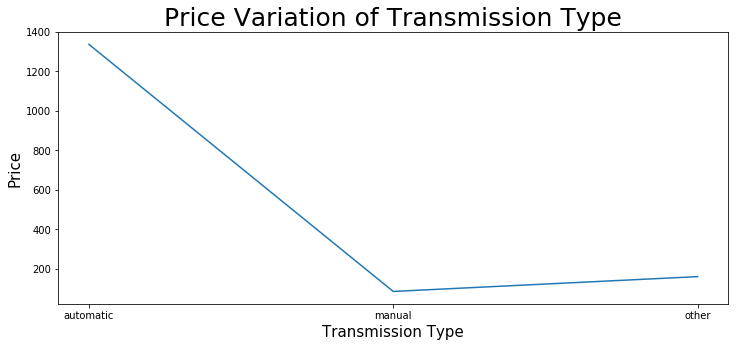

In [28]:
plt.figure (figsize = (12,5))

Cylin_df = cars.groupby ('transmission')['price'].count()
plt.plot(Cylin_df)

plt.xlabel ('Transmission Type',size=15)
plt.ylabel ('Price',size =15)

plt.title('Price Variation of Transmission Type',size=25)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

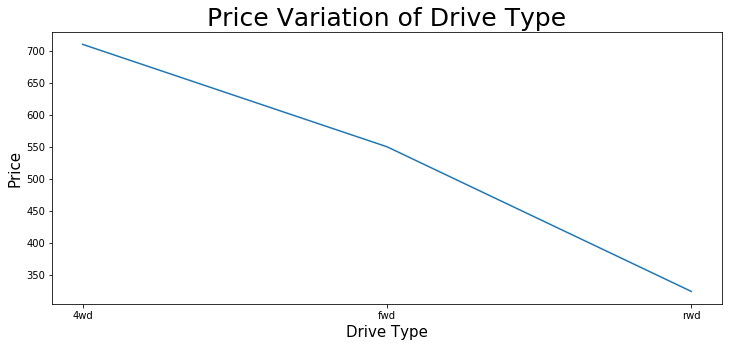

In [29]:
plt.figure (figsize = (12,5))

Cylin_df = cars.groupby ('drive')['price'].count()
plt.plot(Cylin_df)

plt.xlabel ('Drive Type',size=15)
plt.ylabel ('Price',size =15)

plt.title('Price Variation of Drive Type',size=25)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

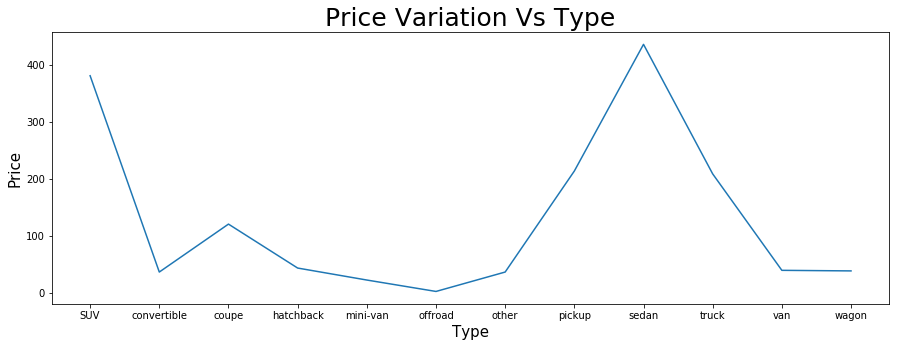

In [30]:
plt.figure (figsize = (15,5))

Cylin_df = cars.groupby ('type')['price'].count()
plt.plot(Cylin_df)


plt.xlabel ('Type',size=15)
plt.ylabel ('Price',size =15)

plt.title('Price Variation Vs Type',size=25)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

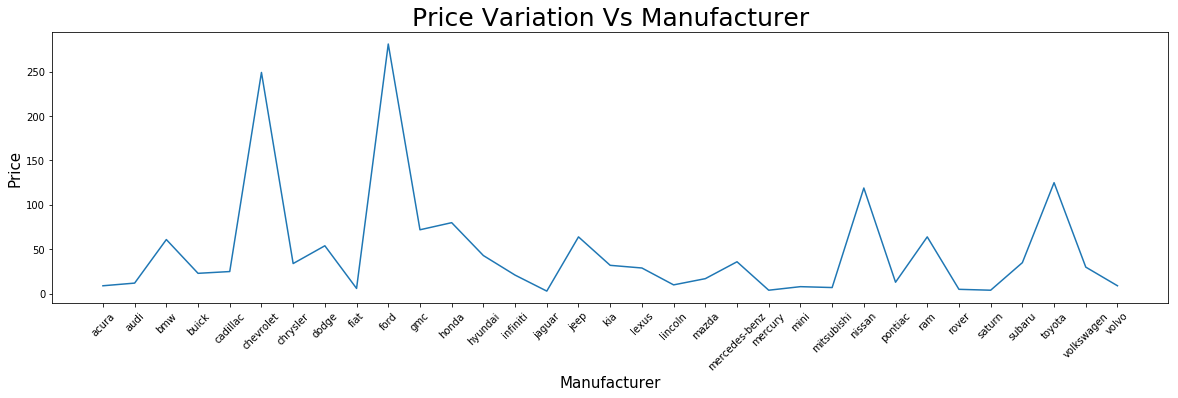

In [31]:
plt.figure (figsize = (20,5))

Cylin_df = cars.groupby ('manufacturer')['price'].count()
plt.plot(Cylin_df)

plt.xlabel ('Manufacturer',size=15)
plt.ylabel ('Price',size =15)

plt.title('Price Variation Vs Manufacturer',size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xticks(rotation=45)

plt.show()